# Einführung in das Quantencomputing
# Modul 1

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**


Themen:
- Geschichte der Quantencomputer
- Inhalt der Schulung
- Atome der Logik

## Vorbereitung der Umgebung ##

In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install qiskit --quiet
    !pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src --quiet
    !pip install numexpr

## Die Geschichte der Quantencomputer ##

** Vor 40 Jahren ** erkannten Physiker, dass normale Computer immer an ihre Grenzen stoßen werden, wenn sie Naturprozesse in ihren kleinsten Strukturen berechnen bzw. simulieren. U.a. der legendäre **Nobelpreisträger Richard Feynmann ** postulierte daher eine vollkommen neuartige Rechenmaschine: Ein Computer der nicht auf den Gesetzen der Booleschen Logik, sondern **ein Computer, der auf den Gesetzen der Quantenmechanik basiert**. Ein Quantencomputer!

In der folgenden Jahren wurden viele der theoretischen Konzepte entwickelt. Die wir Ihnen in den nächsten Sessions vorstellen werden. Die praktische Umsetzung der Quantencomputer blieb für viele Jahre ein fast aussichtsloses Unterfangen.

**1995 entdeckte Peter Shaw, den ersten monumentalen Quanten Algorthimus**. Er wies nach, dass das Problem der Primzahlzerlagung mit einem Quantencomputer exponentiell schneller gelöst werden kann, als mit jedem herkömmlichen Algorithmus. Durch diese Entdeckung setzte ein Boom in dem Forschungszweig ein.




## Inhalt der Schulung "Einführung in das Quanten-Computing" ##

**Folgende Themen werden wir behandeln:**

  * Grundlagen der Quantenmechanik
    * Was ist ein Qubit?
    * Messungen in der Quantenmechanik
  * Operationen auf Qubits: 1-Qubit-Gatter, 2-Qubit-Gatter
  * Einfache QC-Schaltungen / einfache Qiskit-Programme
    * Unser Lehrmaterial basiert auf IBM Textbook und IBMs Qiskit
    * Wir setzen grundlegende Programmierkenntnisse voraus. Insbesonsere sollten Sie in der Lage sein einfache Python Programme lesen bzw. verstehen zu können
  * Mathematische Grundlagen: 
    * Komplexe Zahlen:$ \sqrt{-1} = i $
    * Lineare Algebra: Vektor- /Zustandsraum, Basis, Matrizen, Eigenwerte / -vektoren
    * **Wir setzen keine „Höhere“ Mathematik voraus**. Das bedeutet aber auch, dass wir einiges an Höherer Mathematik einführen werden.
  * Wichtige Quanten-Algorithmen
    * Grover-Algorithmus?
    * Quanten-Fourietransformation?
    * Variational Algorithms?

## Die Atome der Logik ##

Wenn Sie der Meinung sind, dass die Quantenmechanik eine Herausforderung darstellt, sind Sie nicht allein. Alle unsere Intuitionen basieren auf alltäglichen Erfahrungen und können daher das Verhalten von Kugeln und Bananen besser verstehen als Atome oder Elektronen. Obwohl Quantenobjekte zunächst zufällig und chaotisch wirken können, folgen sie einfach einem anderen Regelwerk. Sobald wir diese Regeln kennen, können wir sie verwenden, um neue und leistungsstarke Technologien zu erstellen. Quantum Computing wird das revolutionärste Beispiel dafür sein.

![image1](images/atoms10.png)


**Frage: Was ist ein Bit?**

**Antwort: Die kleinste Einheit für Information: entweder ```0``` oder ```1```.**

Die Idee, dass Informationen als eine Reihe von ```0```en and ```1``en gespeichert und verarbeitet werden können, ist eine ziemlich große konzeptionelle Hürde, aber die meisten Menschen wissen es heute, ohne darüber nachzudenken. Ausgehend davon können wir uns Bits vorstellen, die den Regeln der Quantenmechanik entsprechen. Diese Quantenbits oder * Qubits * ermöglichen es uns dann, Informationen auf neue und unterschiedliche Weise zu verarbeiten.

Wir werden tiefer in die Welt der Qubits eintauchen. Dafür brauchen wir eine Möglichkeit, um zu verfolgen, was sie tun, wenn wir Tore anwenden. Der mächtigste Weg, dies zu tun, ist die Verwendung der mathematischen Sprache von Vektoren und Matrizen.

![image2](images/bloch.png)

Dieses Kapitel ist am effektivsten für Leser, die bereits mit Vektoren und Matrizen vertraut sind. Diejenigen, die nicht vertraut sind, werden wahrscheinlich auch in Ordnung sein, obwohl es nützlich sein kann, von Zeit zu Zeit unsere [Einführung in die lineare Algebra für das Quantencomputing](XAnhang-linear_algebra.ipynb) zu konsultieren.

Da wir Qiskit verwenden werden, unser Python-basiertes Framework für Quantencomputer, wäre es auch nützlich, die Grundlagen von Python zu kennen. Diejenigen, die eine Grundierung benötigen, können die [Einführung in Python- und Jupyter-Notebook](XAnhang-python-and-jupyter-notebooks.ipynb) konsultieren.

Das Programmieren eines Quantencomputers ist mittlerweile etwas, das jeder bequem von zu Hause aus tun kann.

Aber was soll man schaffen? Was ist überhaupt ein Quantenprogramm? Was ist eigentlich ein Quantencomputer?

Diese Fragen können durch Vergleiche mit Standard-Digitalcomputern beantwortet werden. Leider verstehen die meisten Menschen auch nicht, wie digitale Computer funktionieren. In diesem Artikel werden die Grundprinzipien dieser Geräte erläutert. Um uns später beim Übergang zum Quantencomputer zu helfen, verwenden wir dieselben Tools wie für Quantencomputer.

### Inhalt

1. [Informationen in Bits aufteilen](#bits)
2. [Berechnung als Diagramm](#diagram)
3. [Ihr erster Quantenschaltkreis](#first-circuit)
4. [Beispiel: Addiererschaltung](#adder)       
  4.1 [Codierung einer Eingabe](#encoding)    
  4.2 [Erinnerung wie man addiert](#remembering-add)    
  4.3 [Addieren mit Qiskit](#adding-qiskit)
 

Im Folgenden finden Sie einige Python-Codes, die wir ausführen müssen, wenn wir den Code auf dieser Seite verwenden möchten:

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

### 1. Informationen in Bits aufteilen <a id="bits"></a>

Das erste, was wir wissen müssen, ist die Idee von Bits. Dies ist das einfachste Alphabet der Welt. Mit nur zwei Zeichen, 0 und 1, können wir jede Information darstellen.

Ein Beispiel sind Zahlen. Sie sind es wahrscheinlich gewohnt, eine Zahl durch eine Zeichenfolge mit den zehn Ziffern 0, 1, 2, 3, 4, 5, 6, 7, 8 und 9 darzustellen. In dieser Ziffernfolge gibt jede Ziffer an, wie oft die Zahl ist enthält eine bestimmte Potenz von zehn. Wenn wir zum Beispiel 9213 schreiben, meinen wir



$$ 9000 + 200 + 10 + 3 $$



oder, ausgedrückt in einer Weise, die die Zehnerpotenzen betont



$$ (9\times10^3) + (2\times10^2) + (1\times10^1) + (3\times10^0) $$




Obwohl wir dieses System normalerweise basierend auf der Nummer 10 verwenden, können wir eines genauso einfach basierend auf einer anderen Nummer verwenden. Das Binärzahlensystem basiert beispielsweise auf der Nummer zwei. Dies bedeutet, dass die beiden Zeichen 0 und 1 verwendet werden, um Zahlen als Vielfache von Zweierpotenzen auszudrücken. Beispielsweise wird 9213 zu 10001111111101, da



$$ 9213  = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11})+ (0 \times 2^{10}) +(1 \times 2^9) + (1 \times 2^8) + (1 \times 2^7) \\\\ \,\,\,   + (1 \times 2^6) + (1 \times 2^5) + (1 \times 2^4) + (1 \times 2^3) + (1 \times 2^2) + (0 \times 2^1) + (1 \times 2^0) $$



Darin drücken wir Zahlen als Vielfache von 2, 4, 8, 16, 32 usw. anstelle von 10, 100, 1000 usw. aus.
<a id="binary_widget"> </a>

In [1]:
#from qiskit_textbook.widgets import binary_widget
#binary_widget(nbits=5)

Diese als Binärzeichenfolgen bezeichneten Bitfolgen können verwendet werden, um mehr als nur Zahlen darzustellen. Beispielsweise gibt es eine Möglichkeit, Text mithilfe von Bits darzustellen. Für jeden Buchstaben, jede Zahl oder jedes Interpunktionszeichen, das Sie verwenden möchten, können Sie mit [dieser Tabelle](https://www.ibm.com/support/knowledgecenter/en/ssw_aix_72/com.ibm.aix.networkcomm/conversion_table.htm) eine entsprechende Zeichenfolge mit höchstens acht Bits finden. Obwohl diese ziemlich willkürlich sind, ist dies ein weithin vereinbarter Standard. Tatsächlich wurde es verwendet, um diesen Artikel über das Internet an Sie zu übermitteln.

So werden alle Informationen in Computern dargestellt. Ob Zahlen, Buchstaben, Bilder oder Ton, alles existiert in Form von Binärzeichenfolgen.

Quantencomputer basieren wie unsere Standard-Digitalcomputer auf derselben Grundidee. Der Hauptunterschied besteht darin, dass sie * Qubits * verwenden, eine Erweiterung des Bits zur Quantenmechanik. Im Rest dieses Lehrbuchs werden wir untersuchen, was Qubits sind, was sie können und wie sie es tun. In diesem Abschnitt geht es jedoch überhaupt nicht um Quanten. Wir verwenden also nur Qubits, als wären sie Bits.

#### Kurze Übung
1. Denken Sie an eine Zahl und versuchen Sie, sie binär aufzuschreiben.
2. Wenn Sie $n$ Bits haben, in wie vielen verschiedenen Zuständen können sie sich befinden?

### 2. Berechnung als Diagramm <a id="diagram"> </a>

Unabhängig davon, ob wir Qubits oder Bits verwenden, müssen wir sie manipulieren, um die Eingaben in die von uns benötigten Ausgaben umzuwandeln. Für die einfachsten Programme mit sehr wenigen Bits ist es nützlich, diesen Prozess in einem Diagramm darzustellen, das als * Schaltplan * bekannt ist. Diese haben Eingänge auf der linken Seite, Ausgänge auf der rechten Seite und Operationen, die durch arkane Symbole dazwischen dargestellt werden. Diese Operationen werden hauptsächlich aus historischen Gründen als "Tore" bezeichnet.

Hier ist ein Beispiel dafür, wie eine Schaltung für standardmäßige bitbasierte Computer aussieht. Es wird nicht erwartet, dass Sie verstehen, was es tut. Es sollte Ihnen lediglich eine Vorstellung davon geben, wie diese Schaltkreise aussehen.

![image3](images/classical_circuit.png)

Für Quantencomputer verwenden wir dieselbe Grundidee, haben jedoch unterschiedliche Konventionen für die Darstellung von Eingaben, Ausgaben und Symbolen, die für Operationen verwendet werden. Hier ist die Quantenschaltung, die den gleichen Prozess wie oben darstellt.

![image4](images/quantum_circuit.png)

Im Rest dieses Abschnitts werden wir erklären, wie Schaltungen aufgebaut werden. Am Ende wissen Sie, wie Sie die obige Schaltung erstellen, was sie tut und warum sie nützlich ist.

### 3. Ihr erster Quantenschaltkreis <a id="first-circuit"></a>

In einer Schaltung müssen wir normalerweise drei Jobs ausführen: Zuerst die Eingabe codieren, dann eine tatsächliche Berechnung durchführen und schließlich eine Ausgabe extrahieren. Bei Ihrer ersten Quantenschaltung konzentrieren wir uns auf den letzten dieser Jobs. Wir beginnen mit der Erstellung einer Schaltung mit acht Qubits und acht Ausgängen.

In [5]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

Diese Schaltung, die wir `qc_output` genannt haben, wird von Qiskit mit `QuantumCircuit` erstellt. Die Zahl `n_q` definiert die Anzahl der Qubits in der Schaltung. Mit `n_b` definieren wir die Anzahl der Ausgangsbits, die wir am Ende aus der Schaltung extrahieren.

Die Extraktion von Ausgängen in einer Quantenschaltung erfolgt unter Verwendung einer Operation, die als `measure` bezeichnet wird. Jede Messung weist ein bestimmtes Qubit an, einem bestimmten Ausgangsbit eine Ausgabe zu geben. Der folgende Code fügt jedem unserer acht Qubits eine `measure` -Operation hinzu. Die Qubits und Bits sind beide mit den Zahlen von 0 bis 7 gekennzeichnet (denn so machen Programmierer gerne Dinge). Der Befehl `qc.measure (j, j)` fügt unserer Schaltung `qc` eine Messung hinzu, die das Qubit `j` anweist, eine Ausgabe in das Bit `j` zu schreiben.


In [8]:
for j in range(n):
    qc_output.measure(j,j)

Nachdem unsere Schaltung etwas enthält, schauen wir uns das an.

In [9]:
qc_output.draw()

┌─┐                     
q_0: |0>┤M├─────────────────────
        └╥┘┌─┐                  
q_1: |0>─╫─┤M├──────────────────
         ║ └╥┘┌─┐               
q_2: |0>─╫──╫─┤M├───────────────
         ║  ║ └╥┘┌─┐            
q_3: |0>─╫──╫──╫─┤M├────────────
         ║  ║  ║ └╥┘┌─┐         
q_4: |0>─╫──╫──╫──╫─┤M├─────────
         ║  ║  ║  ║ └╥┘┌─┐      
q_5: |0>─╫──╫──╫──╫──╫─┤M├──────
         ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: |0>─╫──╫──╫──╫──╫──╫─┤M├───
         ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: |0>─╫──╫──╫──╫──╫──╫──╫─┤M├
         ║  ║  ║  ║  ║  ║  ║ └╥┘
 c_0: 0 ═╩══╬══╬══╬══╬══╬══╬══╬═
            ║  ║  ║  ║  ║  ║  ║ 
 c_1: 0 ════╩══╬══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║  ║ 
 c_2: 0 ═══════╩══╬══╬══╬══╬══╬═
                  ║  ║  ║  ║  ║ 
 c_3: 0 ══════════╩══╬══╬══╬══╬═
                     ║  ║  ║  ║ 
 c_4: 0 ═════════════╩══╬══╬══╬═
                        ║  ║  ║ 
 c_5: 0 ════════════════╩══╬══╬═
                           ║  ║ 
 c_6: 0 ═══════════════════╩══╬═
                              ║ 
 c_7: 0 ══════════════════════╩═

 Qubits werden immer initialisiert, um die Ausgabe ```0``` zu erhalten. Da wir in der obigen Schaltung nichts mit unseren Qubits machen, ist dies genau das Ergebnis, das wir erhalten, wenn wir sie messen. Wir können dies sehen, indem wir die Schaltung viele Male laufen lassen und die Ergebnisse in einem Histogramm darstellen. Wir werden feststellen, dass das Ergebnis immer ```00000000``` ist: eine ```0``` von jedem Qubit.

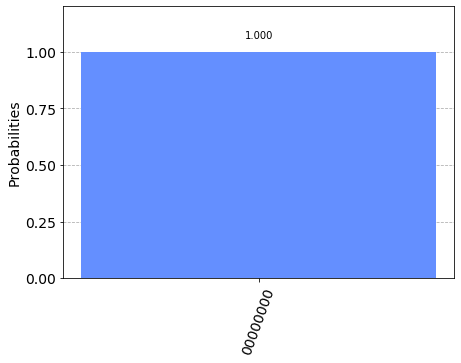

In [10]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Der Grund dafür, dass viele Male ausgeführt und das Ergebnis als Histogramm angezeigt wird, liegt darin, dass Quantencomputer möglicherweise zufällige Ergebnisse aufweisen. In diesem Fall erhalten wir mit Sicherheit nur das Ergebnis ```00000000```, da wir nichts Quantisches tun.

Beachten Sie, dass dieses Ergebnis von einem Quantensimulator stammt, einem Standardcomputer, der berechnet, was ein idealer Quantencomputer tun würde. Simulationen sind nur für eine kleine Anzahl von Qubits (~ 30 Qubits) möglich, aber sie sind dennoch ein sehr nützliches Werkzeug beim Entwerfen Ihrer ersten Quantenschaltungen. Um auf einem realen Gerät ausgeführt zu werden, müssen Sie lediglich ```Aer.get_backend('qasm_simulator')``` durch das Backend-Objekt des Geräts ersetzen, das Sie verwenden möchten.

## 4 Beispiel: Addiererschaltung <a id="adder"></a>
### 4.1 Codierung einer Eingabe <a id="encoding"></a>

Schauen wir uns nun an, wie eine andere Binärzeichenfolge als Eingabe codiert wird. Dafür brauchen wir ein sogenanntes NICHT-Gatter. Dies ist die grundlegendste Operation, die Sie in einem Computer ausführen können. Es wird einfach der Bitwert umgedreht: ```0``` wird zu ``` 1``` und ```1``` wird zu ``` 0```. Für Qubits ist es eine Operation namens ```x```, die die Aufgabe des NOT übernimmt.

Im Folgenden erstellen wir eine neue Schaltung für die Codierung und nennen sie `qc_encode`. Im Moment geben wir nur die Anzahl der Qubits an.

In [11]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw()

q_0: |0>─────
             
q_1: |0>─────
             
q_2: |0>─────
             
q_3: |0>─────
             
q_4: |0>─────
             
q_5: |0>─────
             
q_6: |0>─────
        ┌───┐
q_7: |0>┤ X ├
        └───┘

Das Extrahieren der Ergebnisse kann mit der Schaltung erfolgen, die wir zuvor hatten: `qc_output`. Durch Hinzufügen der beiden Schaltkreise mit `qc_encode + qc_output` wird ein neuer Schaltkreis erstellt, der alles enthält, was zum Extrahieren eines am Ende hinzugefügten Ausgangs erforderlich ist.

In [12]:
qc = qc_encode + qc_output
qc.draw()

┌─┐                     
q_0: |0>─────┤M├─────────────────────
             └╥┘┌─┐                  
q_1: |0>──────╫─┤M├──────────────────
              ║ └╥┘┌─┐               
q_2: |0>──────╫──╫─┤M├───────────────
              ║  ║ └╥┘┌─┐            
q_3: |0>──────╫──╫──╫─┤M├────────────
              ║  ║  ║ └╥┘┌─┐         
q_4: |0>──────╫──╫──╫──╫─┤M├─────────
              ║  ║  ║  ║ └╥┘┌─┐      
q_5: |0>──────╫──╫──╫──╫──╫─┤M├──────
              ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: |0>──────╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: |0>┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 c_0: 0 ══════╩══╬══╬══╬══╬══╬══╬══╬═
                 ║  ║  ║  ║  ║  ║  ║ 
 c_1: 0 ═════════╩══╬══╬══╬══╬══╬══╬═
                    ║  ║  ║  ║  ║  ║ 
 c_2: 0 ════════════╩══╬══╬══╬══╬══╬═
                       ║  ║  ║  ║  ║ 
 c_3: 0 ═══════════════╩══╬══╬══╬══╬═
                          ║  ║  ║  ║ 
 c_4: 0 ══════════════════╩══╬══╬══╬═
                             ║  ║  ║ 
 c_5: 0 ═════════════════════╩══╬══╬═
                                ║  ║ 
 c_6: 0 ════════════════════════╩══╬═
                                   ║ 
 c_7: 0 ═══════════════════════════╩═

Jetzt können wir die kombinierte Schaltung ausführen und die Ergebnisse betrachten.

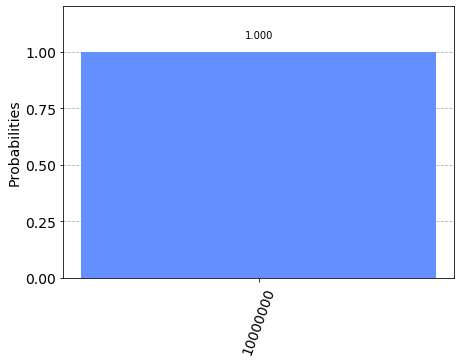

In [13]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Jetzt gibt unser Computer stattdessen den String ```10000000``` aus.

Das Bit, das wir umgedreht haben und das aus Qubit 7 stammt, befindet sich ganz links in der Zeichenfolge. Dies liegt daran, dass Qiskit die Bits in einer Zeichenfolge von rechts nach links nummeriert. Einige bevorzugen es, ihre Bits umgekehrt zu nummerieren, aber das System von Qiskit hat sicherlich seine Vorteile, wenn wir die Bits zur Darstellung von Zahlen verwenden. Konkret bedeutet dies, dass Qubit 7 uns sagt, wie viele $2^7$ s wir in unserer Zahl haben. Durch Umdrehen dieses Bits haben wir jetzt die Nummer 128 in unseren einfachen 8-Bit-Computer geschrieben.

Versuchen Sie nun, eine andere Nummer für sich selbst zu schreiben. Sie könnten zum Beispiel Ihr Alter tun. Verwenden Sie einfach eine Suchmaschine, um herauszufinden, wie die Zahl in Binärform aussieht (wenn sie eine '0b' enthält, ignorieren Sie sie einfach), und fügen Sie dann auf der linken Seite einige Nullen hinzu, wenn Sie jünger als 64 sind.

In [14]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

q_0: |0>─────
        ┌───┐
q_1: |0>┤ X ├
        └───┘
q_2: |0>─────
             
q_3: |0>─────
             
q_4: |0>─────
        ┌───┐
q_5: |0>┤ X ├
        └───┘
q_6: |0>─────
             
q_7: |0>─────

Jetzt wissen wir, wie man Informationen in einem Computer verschlüsselt. Der nächste Schritt besteht darin, es zu verarbeiten: Eine Eingabe, die wir codiert haben, in eine Ausgabe umzuwandeln, die wir benötigen.

### 4.2 Erinnerung wie man addiert  <a id="remembering-add"></a>

Um Eingaben in Ausgaben umzuwandeln, müssen wir ein Problem lösen. Lassen Sie uns einige grundlegende Berechnungen anstellen. In der Grundschule haben Sie gelernt, große mathematische Probleme in überschaubare Teile zu zerlegen. Wie würden Sie beispielsweise Folgendes lösen?

```
   9213
+  1854
=  ????
```

Eine Möglichkeit besteht darin, es Ziffer für Ziffer von rechts nach links zu tun. Also fangen wir mit 3+4 an
```
   9213
+  1854
=  ???7
```

Und dann 1+5
```
   9213
+  1854
=  ??67
```

Dann haben wir 2+8 = 10. Da dies eine zweistellige Antwort ist, müssen wir die eine in die nächste Spalte übertragen.

```
   9213
+  1854
=  ?067
   ¹
```

Schließlich haben wir 9+1+1=11 und erhalten unsere Antwort

```
   9213
+  1854
= 11067
  ¹
```

Dies mag nur eine einfache Ergänzung sein, zeigt aber die Prinzipien hinter allen Algorithmen. Unabhängig davon, ob der Algorithmus mathematische Probleme löst oder Text oder Bilder verarbeitet, teilen wir große Aufgaben immer in kleine und einfache Schritte auf.

Um auf einem Computer ausgeführt zu werden, müssen Algorithmen auf die kleinstmöglichen und einfachsten Schritte kompiliert werden. Um zu sehen, wie diese aussehen, führen wir das obige Additionsproblem erneut aus, jedoch in binärer Form.


```
   10001111111101
+  00011100111110
                                    
= ??????????????
```

Beachten Sie, dass die zweite Zahl links eine Reihe zusätzlicher Nullen enthält. Dies dient nur dazu, die beiden Zeichenfolgen gleich lang zu machen.

Unsere erste Aufgabe ist es, die 1+0 für die rechte Spalte zu machen. In der Binärdatei lautet die Antwort wie in jedem Zahlensystem 1. Wir erhalten das gleiche Ergebnis für die 0+1 der zweiten Spalte.

```
   10001111111101
+  00011100111110

=  ????????????11
```

Als nächstes haben wir 1+1. Wie Sie sicherlich wissen, ist 1+1=2. In Binärform wird die Zahl 2 ```10``` geschrieben und benötigt daher zwei Bits. Dies bedeutet, dass wir die 1 tragen müssen, genau wie wir es für die Zahl 10 in Dezimalzahl tun würden.

```
   10001111111101
+  00011100111110
=  ???????????011
             ¹
```

In der nächsten Spalte müssen wir nun ```1+1+1``` berechnen. Dies bedeutet, dass drei Zahlen addiert werden, sodass die Dinge für unseren Computer immer komplizierter werden. Aber wir können es immer noch zu einfacheren Operationen kompilieren und dies auf eine Weise tun, bei der wir immer nur zwei Bits addieren müssen. Dazu können wir nur mit den ersten beiden Einsen beginnen.

```
   1
+  1
= 10
```

Jetzt müssen wir diese ```10``` zur endgültigen ```1``` hinzufügen, was mit unserer üblichen Methode zum Durchlaufen der Spalten erfolgen kann.

```
  10
+ 01
= 11
```

Die endgültige Antwort lautet ```11``` (auch als 3 bekannt).

Jetzt können wir zum Rest des Problems zurückkehren. Mit der Antwort von ```11``` haben wir ein weiteres Übertragsbit.

```
   10001111111101
+  00011100111110
=  ??????????1011
            ¹¹
```

Jetzt haben wir also noch 1+1+1 zu tun. Aber wir wissen bereits, wie das geht, also ist es keine große Sache.

Alles, was bisher noch übrig ist, wissen wir bereits. Dies liegt daran, dass Sie nur vier mögliche Dinge berechnen müssen, wenn Sie alles in zwei Bits aufteilen. Hier sind die vier Grundsummen (wir schreiben alle Antworten mit zwei Bits, um konsistent zu sein).

```
0+0 = 00 (dezimal ist dies 0+0 = 0)
0+1 = 01 (dezimal ist dies 0+1 = 1)
1+0 = 01 (dezimal ist dies 1+0 = 1)
1+1 = 10 (dezimal ist dies 1+1 = 2)
```

Dies wird als * Halbaddierer * bezeichnet. Wenn unser Computer dies implementieren kann und viele von ihnen miteinander verketten kann, kann er alles hinzufügen.

### 4.3 Addieren mit Qiskit <a id="adding-qiskit"></a>

Lassen Sie uns mit Qiskit unseren eigenen Halbaddierer erstellen. Dies umfasst einen Teil der Schaltung, der die Eingabe codiert, einen Teil, der den Algorithmus ausführt, und einen Teil, der das Ergebnis extrahiert. Der erste Teil muss geändert werden, wenn wir eine neue Eingabe verwenden möchten, der Rest bleibt jedoch immer gleich.

![half adder implemented on a quantum circuit](images/half-adder.svg)

Die zwei Bits, die wir hinzufügen möchten, sind in den Qubits 0 und 1 codiert. Das obige Beispiel codiert eine ```1``` in diesen beiden Qubits und versucht daher, die Lösung von ```1+1``` zu finden. Das Ergebnis ist eine Folge von zwei Bits, die wir aus den Qubits 2 und 3 auslesen werden. Sie müssen nur noch das eigentliche Programm ausfüllen, das sich in der Leerstelle in der Mitte befindet.

Die gestrichelten Linien im Bild dienen nur zur Unterscheidung der verschiedenen Teile der Schaltung (obwohl sie auch interessantere Verwendungen haben können). Sie werden mit dem Befehl "Barriere" erstellt.

Die Grundoperationen des Rechnens sind als Logikgatter bekannt. Wir haben das NOT-Gatter bereits verwendet, aber dies reicht nicht aus, um unseren Halbaddierer zu machen. Wir konnten es nur verwenden, um die Antworten manuell aufzuschreiben. Da wir möchten, dass der Computer die eigentliche Datenverarbeitung für uns übernimmt, benötigen wir einige leistungsstärkere Gates.

Um zu sehen, was wir brauchen, schauen wir uns noch einmal an, was unser Halbaddierer tun muss.

```
0 + 0 = 00
0 + 1 = 01
1 + 0 = 01
1 + 1 = 10
```

Das Bit ganz rechts in allen vier dieser Antworten wird vollständig davon bestimmt, ob die beiden hinzugefügten Bits gleich oder verschieden sind. Für ```0+0``` und ```1+1```, wo die beiden Bits gleich sind, kommt das am weitesten rechts stehende Bit der Antwort mit ```0``` heraus. Für ```0+1``` und ```1+0```, wo wir verschiedene Bitwerte hinzufügen, ist das Bit ganz rechts ```1```.

Um diesen Teil unserer Lösung richtig zu machen, benötigen wir etwas, das herausfinden kann, ob zwei Bits unterschiedlich sind oder nicht. Traditionell wird dies beim Studium der digitalen Berechnung als XOR-Gatter bezeichnet.

| Eingabe 1 | Eingabe 2 | XOR-Ausgabe |
|: -------: |: -------: |: ------: |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

In Quantencomputern wird die Arbeit des XOR-Gatters durch das Controlled-NOT-Gatter erledigt. Da dies ein ziemlich langer Name ist, nennen wir ihn normalerweise nur CNOT. In Qiskit heißt es ```cx```, was noch kürzer ist. In Schaltplänen wird es wie in der Abbildung unten gezeichnet.

In [16]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

q_0: |0>──■──
        ┌─┴─┐
q_1: |0>┤ X ├
        └───┘

Dies wird auf ein Paar Qubits angewendet. Man fungiert als Kontroll-Qubit (dies ist das mit dem kleinen Punkt). Das andere fungiert als *Ziel-Qubit* (mit dem großen Kreis).

Es gibt mehrere Möglichkeiten, die Wirkung des CNOT zu erklären. Eine ist zu sagen, dass es seine zwei Eingangsbits betrachtet, um zu sehen, ob sie gleich oder verschieden sind. Als nächstes überschreibt es das Ziel-Qubit mit der Antwort. Das Ziel wird ```0```, wenn sie gleich sind, und ```1```, wenn sie unterschiedlich sind.

<img src="images/cnot_xor.svg">

Eine andere Möglichkeit, das CNOT zu erklären, besteht darin, zu sagen, dass es ein NICHT auf dem Ziel ausführt, wenn die Steuerung ```1``` ist, und nichts anderes tut. Diese Erklärung ist genauso gültig wie die vorherige (tatsächlich gibt sie dem Gatter seinen Namen).

Probieren Sie den CNOT selbst aus, indem Sie alle möglichen Eingaben ausprobieren. Hier ist zum Beispiel eine Schaltung, die den CNOT mit dem Eingang ```01``` testet.

In [19]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw()

┌───┐ ░            ░       
q_0: |0>┤ X ├─░───■────────░───────
        ├───┤ ░   │        ░       
q_1: |0>┤ X ├─░───┼────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├─░─┤M├───
              ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: |0>──────░────────────░──╫─┤M├
              ░            ░  ║ └╥┘
 c_0: 0 ══════════════════════╩══╬═
                                 ║ 
 c_1: 0 ═════════════════════════╩═

Wir sind jetzt auf halbem Weg zu einem voll funktionsfähigen Halbaddierer. Wir haben nur noch den anderen Teil der Ausgabe zu erledigen: den, der auf Qubit 3 leben wird.

Wenn Sie sich die vier möglichen Summen noch einmal ansehen, werden Sie feststellen, dass es nur einen Fall gibt, für den dies ```1``` anstelle von ```0``` ist: ```1 + 1``` = ```10```. Es passiert nur, wenn beide Bits, die wir hinzufügen, ```1``` sind.

Um diesen Teil der Ausgabe zu berechnen, könnten wir unseren Computer dazu bringen, zu prüfen, ob beide Eingaben ```1``` sind. Wenn dies der Fall ist - und nur wenn dies der Fall ist -, müssen wir auf Qubit 3 ein NOT-Gatter ausführen. Dadurch wird es nur für diesen Fall auf den erforderlichen Wert von ```1``` umgedreht, sodass wir die Ausgabe erhalten, die wir benötigen.

Dafür brauchen wir ein neues Gate: wie ein CNOT, aber gesteuert auf zwei Qubits anstatt nur auf einem. Dies führt nur dann ein NICHT auf dem Ziel-Qubit durch, wenn sich beide Steuerelemente im Zustand ```1``` befinden. Dieses neue Gatter heißt *Toffoli*. Für diejenigen unter Ihnen, die mit Booleschen Logikgattern vertraut sind, ist es im Grunde ein UND-Gatter.

In Qiskit wird der Toffoli mit dem Befehl `ccx` dargestellt.

In [21]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: |0>┤ X ├─░───■─────────■───░───────
        ├───┤ ░   │         │   ░       
q_1: |0>┤ X ├─░───┼────■────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├──┼───░─┤M├───
              ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: |0>──────░───────────┤ X ├─░──╫─┤M├
              ░           └───┘ ░  ║ └╥┘
 c_0: 0 ═══════════════════════════╩══╬═
                                      ║ 
 c_1: 0 ══════════════════════════════╩═

In diesem Beispiel berechnen wir  ```1+1```, da die beiden Eingangsbits beide ```1``` sind. Mal sehen, was wir bekommen.

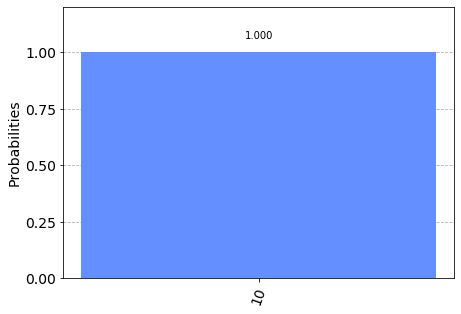

In [22]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Das Ergebnis ist ```10```, die binäre Darstellung der Zahl 2. Wir haben einen Computer gebaut, der das berühmte mathematische Problem 1 + 1 lösen kann!

Jetzt können Sie es mit den anderen drei möglichen Eingaben ausprobieren und zeigen, dass unser Algorithmus auch für diese die richtigen Ergebnisse liefert.

Der Halbaddierer enthält alles, was Sie zum Addieren benötigen. Mit den Gattern NOT, CNOT und Toffoli können wir Programme erstellen, die eine beliebige Anzahl von Zahlen beliebiger Größe addieren.

Diese drei Gatter reichen aus, um auch beim Rechnen alles andere zu erledigen. Wir können sogar auf das CNOT verzichten. Außerdem wird das NOT-Gatter nur benötigt, um Bits mit dem Wert ```1``` zu erstellen. Das Toffoli-Gatter ist im Wesentlichen das Atom der Mathematik. Es ist das einfachste Element, aus dem jede andere Problemlösungstechnik zusammengestellt werden kann.

Wie wir sehen werden, teilen wir beim Quantencomputing das Atom.

In [23]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.12.0',
 'qiskit-aer': '0.4.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.6',
 'qiskit-aqua': '0.6.4',
 'qiskit': '0.15.0'}